# TP3 : Régréssion Linéaire :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. La régression linéaire par moindres carrés sous sklearn :

### 1.1. Etude d'un régresseur linéaire simple :

In [2]:
X = np.array([5.5, 6.0, 6.5, 6.0, 5.0, 6.5, 4.5, 5])
X = X.reshape(-1, 1)
y = np.array([420, 380, 350, 400, 440, 380, 450, 420])

In [16]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X =X.reshape(-1,1)

In [7]:
X.mean()

6.5

In [8]:
y.mean()

52.916666666666664

In [14]:
y = np.array([40, 42, 44, 45, 48, 50, 52, 55, 58, 63, 68, 70])

In [17]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9680117710817823

In [9]:
reg.coef_

NameError: name 'reg' is not defined

In [5]:
reg.intercept_

644.5161290322579

In [6]:
y_pred=reg.predict(X)
y_pred

array([410.32258065, 389.03225806, 367.74193548, 389.03225806,
       431.61290323, 367.74193548, 452.90322581, 431.61290323])

In [7]:
mean_squared_error(y, y_pred)

121.7741935483871

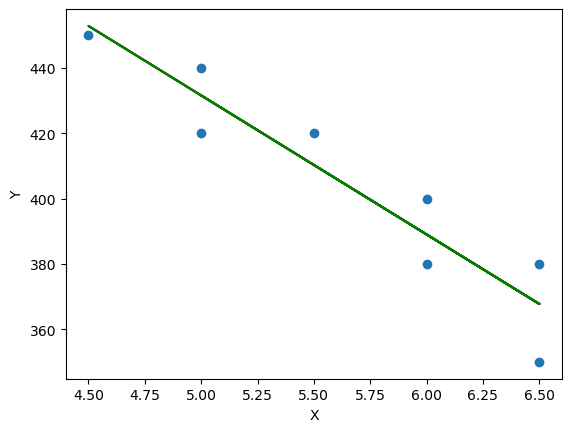

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.plot(X,(reg.coef_*X)+reg.intercept_, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
regFalse = LinearRegression(fit_intercept = False).fit(X, y)
print("Score :",regFalse.score(X, y))
print("Paramètres : Coef =",regFalse.coef_,", Intercept =", regFalse.intercept_)
y_pred=regFalse.predict(X)
print("MSE :",mean_squared_error(y, y_pred))

Score : -5.385116731517507
Paramètres : Coef = [70.27237354] , Intercept = 0.0
MSE : 6385.116731517507


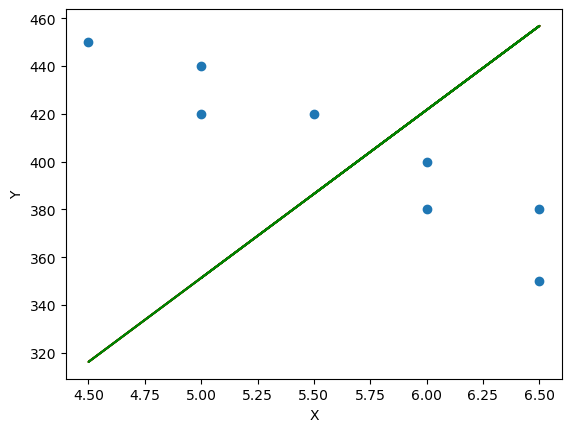

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.plot(X,(regFalse.coef_*X)+regFalse.intercept_, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1.2. Jeu de données Eucalyptus :

In [11]:
data = np.loadtxt('eucalyptus.txt')
data

array([[18.25, 36.  ],
       [19.75, 42.  ],
       [16.5 , 33.  ],
       ...,
       [20.25, 50.  ],
       [20.25, 37.  ],
       [19.75, 40.  ]])

In [12]:
h = data[:,0]
c = data[:,1]
c = c.reshape(-1,1)
reg = LinearRegression().fit(c, h)
print("Paramètres : Coef =",reg.coef_,", Intercept =", reg.intercept_)

Paramètres : Coef = [0.25713786] , Intercept = 9.037475668452768


In [2]:
plt.scatter(c, h, marker='.')
plt.xlabel('c')
plt.ylabel('h')
plt.show()

NameError: name 'plt' is not defined

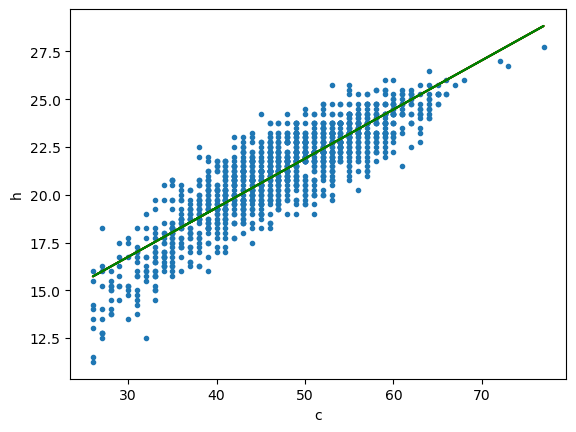

In [13]:
plt.scatter(c, h, marker='.')
plt.plot(c, reg.predict(c), color='red')
plt.plot(c,(reg.coef_*c)+reg.intercept_, color='green')
plt.xlabel('c')
plt.ylabel('h')
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, c, h, cv=10)    
print("Cross_val =",scores.mean())

Cross_val = 0.7024780078821247


In [15]:
myScores = []
myScores.append(scores.mean())

In [16]:
print("Prediction de 22,8 =",reg.predict(np.array(22.8).reshape(-1,1)))

Prediction de 22,8 = [14.90021876]


In [17]:
data = np.loadtxt('eucalyptus.txt')
h = data[:,0]
c1 = data[:,1]
c1 = c1.reshape(-1,1)
c2 = np.sqrt(c1)
c = np.concatenate((c1,c2),axis=1)
c
c.shape

(1429, 2)

In [18]:
linear = LinearRegression().fit(c, h)
print("Paramètres : Coef =",linear.coef_,", Intercept =", linear.intercept_)
print("MSE :",mean_squared_error(h, linear.predict(c)))
scores = cross_val_score(linear, c, h, cv=10)    
print("cross_val :",scores.mean())
myScores.append(scores.mean())

Paramètres : Coef = [-0.48294547  9.98688814] , Intercept = -24.35200327424318
MSE : 1.2880728696441848
cross_val : 0.7328870072880683


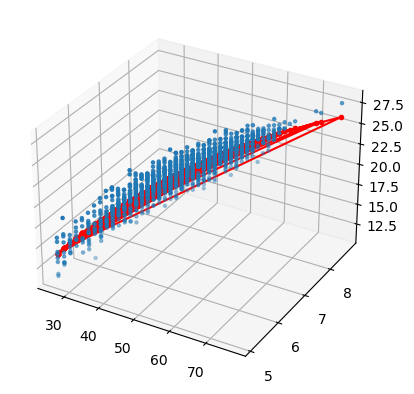

In [19]:
from mpl_toolkits.mplot3d import Axes3D
h_ = linear.coef_[0]*c1+linear.coef_[1]*c2+linear.intercept_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(c1,c2,h, marker='.')
ax.plot(c1,c2,h_,'r', marker='.')

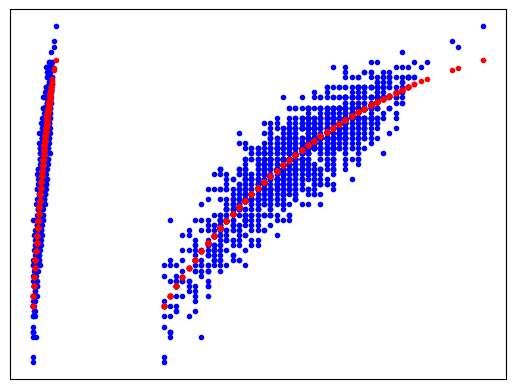

In [20]:
plt.plot(c, h, color="blue", linewidth=0, marker=".")
plt.plot(c, linear.predict(c), ".", color="red", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [21]:
data = np.loadtxt('eucalyptus.txt')
h = data[:,0]
c1 = data[:,1]
c1 = c1.reshape(-1,1)
c2 = np.sqrt(c1)
c3 = c1**2
C = np.concatenate((c1,c2,c3),axis=1)

In [22]:
lin_reg = LinearRegression().fit(C, h)
print("Paramètres : Coef =",lin_reg.coef_,", Intercept =", lin_reg.intercept_)
print("MSE :",mean_squared_error(h, lin_reg.predict(C)))
scores = cross_val_score(lin_reg, C, h, cv=10)    
print("cross_val :",scores.mean())
myScores.append(scores.mean())

Paramètres : Coef = [-2.77594347e+00  3.02868608e+01  8.46121691e-03] , Intercept = -74.45820187627984
MSE : 1.2762153702584975
cross_val : 0.7351224466101725


In [23]:
myScores

[0.7024780078821247, 0.7328870072880683, 0.7351224466101725]

In [28]:
print("Meilleur score by cross_val =",np.max(myScores),"de la régression num :",np.argmax(myScores)+1)

Meilleur score by cross_val = 0.7351224466101725 de la régression num : 3


## 2. Programmation de la régression linéaire par moindres carrés :

In [45]:
X = np.array([5.5, 6.0, 6.5, 6.0, 5.0, 6.5, 4.5, 5])
X = X.reshape(-1, 1)
y = np.array([420, 380, 350, 400, 440, 380, 450, 420])

In [46]:
vecteur = np.ones(X.shape)
vecteur

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [47]:
x = np.append(X,vecteur,axis=1)
x

array([[5.5, 1. ],
       [6. , 1. ],
       [6.5, 1. ],
       [6. , 1. ],
       [5. , 1. ],
       [6.5, 1. ],
       [4.5, 1. ],
       [5. , 1. ]])

In [42]:
y

array([420, 380, 350, 400, 440, 380, 450, 420])

In [44]:
w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x),x)), np.transpose(x)), np.transpose(y))
w

array([-42.58064516, 644.51612903])

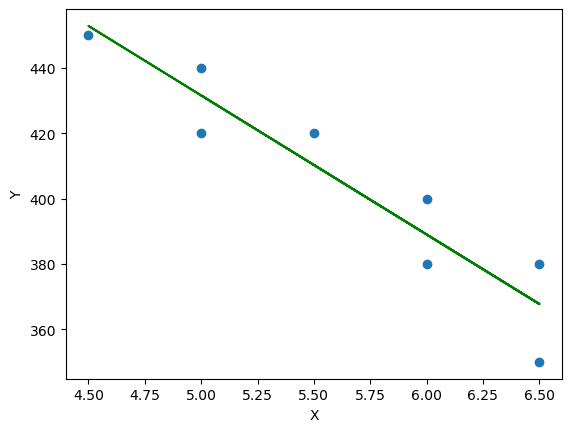

In [49]:
plt.scatter(X, y)
plt.plot(X,(w[0]*X)+w[1], color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [50]:
h = data[:,0]
c = data[:,1]
c = c.reshape(-1,1)
c

array([[36.],
       [42.],
       [33.],
       ...,
       [50.],
       [37.],
       [40.]])

In [52]:
vecteur = np.ones(c.shape)
vecteur

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [54]:
C = np.append(c,vecteur,axis=1)
C

array([[36.,  1.],
       [42.,  1.],
       [33.,  1.],
       ...,
       [50.,  1.],
       [37.,  1.],
       [40.,  1.]])

In [55]:
w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(C),C)), np.transpose(C)), np.transpose(h))
w

array([0.25713786, 9.03747567])